In [12]:
from sklearn.datasets import load_iris 
from sklearn.model_selection import train_test_split 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iris_dataset = load_iris()
iris_dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [3]:
# Description of the data 
description = iris_dataset.DESCR 
description

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

In [4]:
target_names = iris_dataset.target 
target_names

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
# Shape of the data
iris_dataset.data.shape

(150, 4)

In [6]:
# The first five samples and thier features 
iris_dataset.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [23]:
X_train, X_test, y_train, y_test = train_test_split(iris_dataset["data"], iris_dataset["target"], random_state=0)

In [26]:
training_df = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
training_df["species"] = y_train
training_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.9,3.0,4.2,1.5,1
1,5.8,2.6,4.0,1.2,1
2,6.8,3.0,5.5,2.1,2
3,4.7,3.2,1.3,0.2,0
4,6.9,3.1,5.1,2.3,2


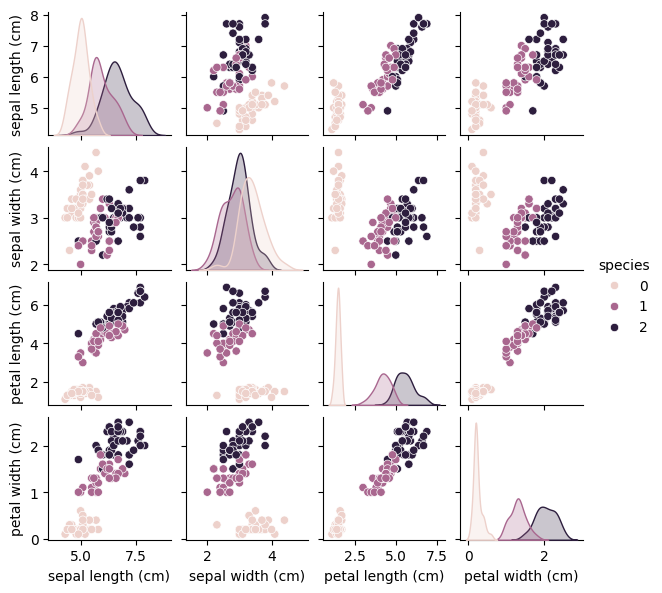

In [30]:
sns.pairplot(training_df, hue="species", height=1.5)

Looking at the pairplot, we can easily identify that classes are well separated by petal and sepal measurements. This means that the Machine Learning model will likely learn how to seperate them.

In [46]:
# Importing the Necessary Libraries 
import numpy as np
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Creating the Model with n_neighbors=1
knn = KNeighborsClassifier(n_neighbors=1)

# Training the Model 
knn.fit(X_train, y_train) 

# Making Predicitions on the Test Set
y_pred = knn.predict(X_test)

# Checking the Accuracy of the Model 
model_accuracy = accuracy_score(y_test, y_pred) 
print("Accuracy is {} \n".format(model_accuracy))

# Making Predictions on New Datasets 
new_data = np.array([[5, 2.9, 1, 0.2]])
print("The Shape of the New Dataset is {}".format(new_data.shape)) 
new_prediction = knn.predict(new_data) 
print("Prediction = {}".format(new_prediction))
print("Prediction Label = {}".format(iris_dataset.target_names[new_prediction]))

Accuracy is 0.9736842105263158 

The Shape of the New Dataset is (1, 4)
Prediction = [0]
Prediction Label = ['setosa']
